# 손글씨 인식 딥러닝 모델

2021-12-16 18:06:02.245299: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-16 18:06:02.245332: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
2021-12-16 18:06:05.543231: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-16 18:06:05.543265: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-16 18:06:05.543297: I tensorflo

Epoch 1/100
30/30 [==============================] - 3s 94ms/step - loss: 0.7932 - accuracy: 0.7959 - val_loss: 0.3345 - val_accuracy: 0.9070
Epoch 2/100
30/30 [==============================] - 3s 91ms/step - loss: 0.2941 - accuracy: 0.9165 - val_loss: 0.2525 - val_accuracy: 0.9294
Epoch 3/100
30/30 [==============================] - 3s 89ms/step - loss: 0.2316 - accuracy: 0.9356 - val_loss: 0.2073 - val_accuracy: 0.9424
Epoch 4/100
30/30 [==============================] - 3s 107ms/step - loss: 0.1935 - accuracy: 0.9459 - val_loss: 0.1799 - val_accuracy: 0.9493
Epoch 5/100
30/30 [==============================] - 3s 96ms/step - loss: 0.1657 - accuracy: 0.9539 - val_loss: 0.1615 - val_accuracy: 0.9538
Epoch 6/100
30/30 [==============================] - 3s 99ms/step - loss: 0.1433 - accuracy: 0.9600 - val_loss: 0.1426 - val_accuracy: 0.9594
Epoch 7/100
30/30 [==============================] - 3s 90ms/step - loss: 0.1259 - accuracy: 0.9651 - val_loss: 0.1313 - val_accuracy: 0.9613
Epoch

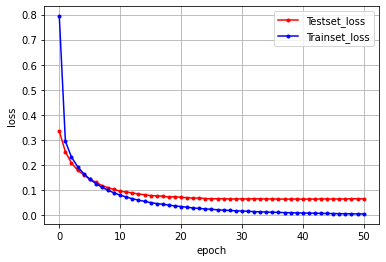

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정합니다.
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

# MNIST 데이터 불러옵니다.
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

# 모델 프레임 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정합니다.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# # 모델 최적화 설정합니다.
# MODEL_DIR = './model/handwrite_model/'
# if not os.path.exists(MODEL_DIR):
#     os.mkdir(MODEL_DIR)
    
# modelpath = './model/{epoch:02d}.hdf5'
# checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
# history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=2000, verbose=0, callbacks=[early_stopping_callback])

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=2000, verbose=1, callbacks=[early_stopping_callback])
# 테스트 정확도를 출력합니다.
print("\n Test Accuracy : %.4f" %(model.evaluate(X_test, Y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현합니다.
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시합니다.
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


# CNN(Convolution Neural Network)


Epoch 00001: val_loss improved from inf to 0.05679, saving model to ./model/01-0.0568.hdf5

Epoch 00002: val_loss improved from 0.05679 to 0.04342, saving model to ./model/02-0.0434.hdf5

Epoch 00003: val_loss improved from 0.04342 to 0.03654, saving model to ./model/03-0.0365.hdf5

Epoch 00004: val_loss improved from 0.03654 to 0.03048, saving model to ./model/04-0.0305.hdf5

Epoch 00005: val_loss improved from 0.03048 to 0.02825, saving model to ./model/05-0.0282.hdf5

Epoch 00006: val_loss did not improve from 0.02825

Epoch 00007: val_loss improved from 0.02825 to 0.02513, saving model to ./model/07-0.0251.hdf5

Epoch 00008: val_loss did not improve from 0.02513

Epoch 00009: val_loss did not improve from 0.02513

Epoch 00010: val_loss did not improve from 0.02513

Epoch 00011: val_loss did not improve from 0.02513

Epoch 00012: val_loss did not improve from 0.02513

Epoch 00013: val_loss did not improve from 0.02513

Epoch 00014: val_loss did not improve from 0.02513

Epoch 00015

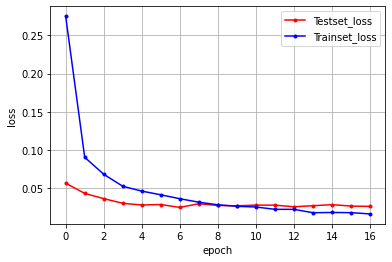

In [18]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정합니다.
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

# MNIST 데이터 불러옵니다.
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)


# 모델 프레임 설정합니다.
# 컨볼루션 신경망 설정합니다.
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


# 모델 실행 환경 설정합니다.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


# 모델 최적화 설정합니다.
MODEL_DIR = './model/handwrite_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy : %.4f" %(model.evaluate(X_test, Y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현합니다.
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시합니다.
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [4]:
from keras.datasets import mnist
(X_train, Y_class_train),(X_test, Y_class_test)=mnist.load_data()

print("학습셋 이미지 수 : {0} 개".format(X_train.shape))
print("테스트셋 이 수 : {0} 개".format(X_test.shape))

학습셋 이미지 수 : (60000, 28, 28) 개
테스트셋 이 수 : (10000, 28, 28) 개


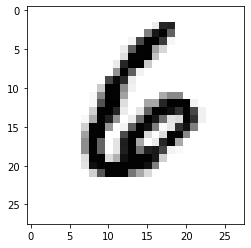

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[13], cmap='Greys')
plt.show()

In [27]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [15]:
print("class : %d" % Y_class_train[13])

class : 6


In [18]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(Y_class_train[13], 100 )
print(y_train)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [25]:
x_train = X_train.reshape(X_train.shape[0], 784).astype('float64')/255
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Epoch 1/5
300/300 [==============================] - 124s 412ms/step - loss: 0.2750 - accuracy: 0.9170 - val_loss: 0.0568 - val_accuracy: 0.9828
Epoch 2/5
300/300 [==============================] - 125s 416ms/step - loss: 0.0906 - accuracy: 0.9736 - val_loss: 0.0434 - val_accuracy: 0.9854
Epoch 3/5
300/300 [==============================] - 124s 415ms/step - loss: 0.0684 - accuracy: 0.9793 - val_loss: 0.0365 - val_accuracy: 0.9878
Epoch 4/5
300/300 [==============================] - 124s 414ms/step - loss: 0.0527 - accuracy: 0.9836 - val_loss: 0.0305 - val_accuracy: 0.9896
Epoch 5/5
313/313 [==============================] - 7s 22ms/step - loss: 0.0282 - accuracy: 0.9910

 Test Accuracy : 0.9910


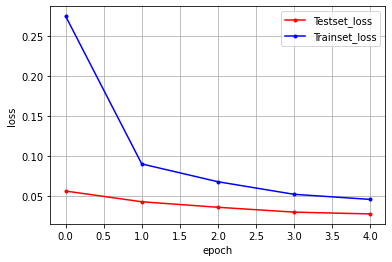

In [13]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정합니다.
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

# MNIST 데이터 불러옵니다.
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)


# 모델 프레임 설정합니다.
# 컨볼루션 신경망 설정합니다.
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


# 모델 실행 환경 설정합니다.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


# # 모델 최적화 설정합니다.
# MODEL_DIR = './model/handwrite_model/'
# if not os.path.exists(MODEL_DIR):
#     os.mkdir(MODEL_DIR)
    
# modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
# checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=200, verbose=1, callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy : %.4f" %(model.evaluate(X_test, Y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현합니다.
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시합니다.
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()